# Análise dos resultados

In [15]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data_dir = glob.glob("./data/*.csv")

dfs = []

for file in data_dir:
    df = pd.read_csv(file)
    dfs.append(df)

results = pd.concat(dfs)

In [17]:
tempo_medio = (
    results.groupby(["method", "list_size", "shuffle_percentage"])["time_seconds"]
    .mean()
    .reset_index()
)

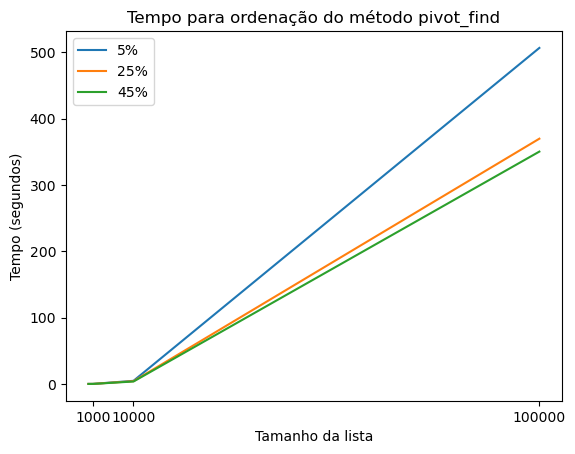

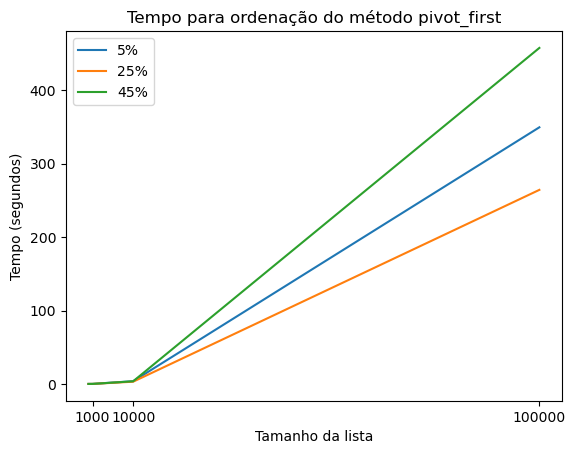

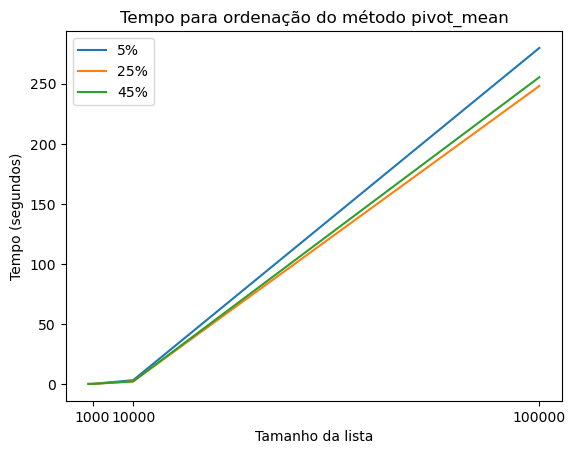

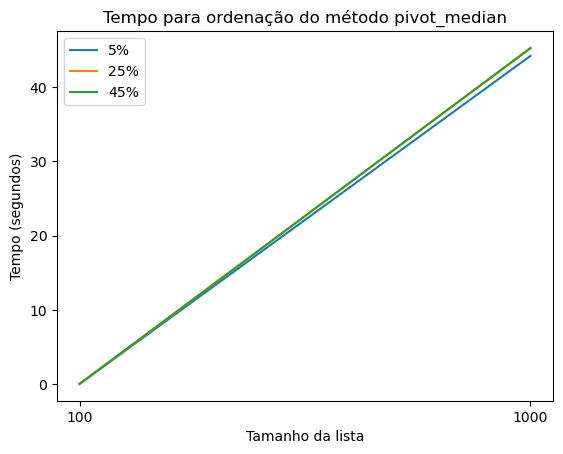

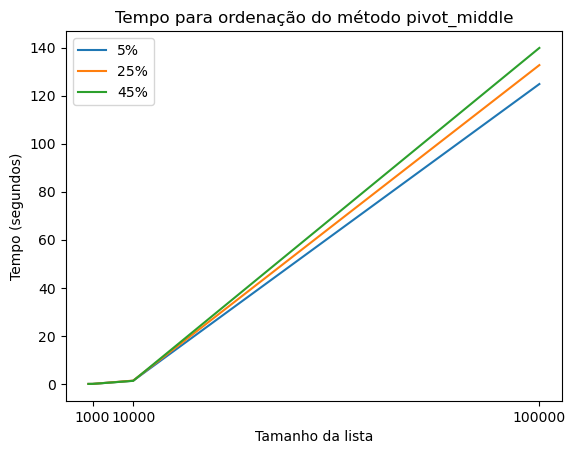

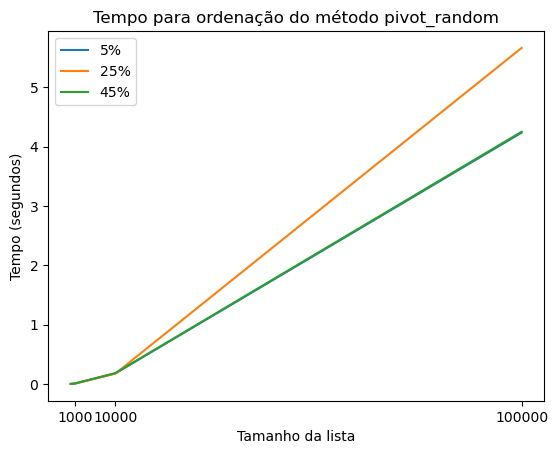

<Figure size 640x480 with 0 Axes>

In [18]:
for label, df in tempo_medio.groupby("method"):
    shuffle_percentages = df["shuffle_percentage"].unique()
    for shuffle_percentage in shuffle_percentages:
        df_temp = df[df["shuffle_percentage"] == shuffle_percentage]
        plt.plot(
            df_temp["list_size"].values,
            df_temp["time_seconds"].values,
            label=f"{shuffle_percentage}%",
        )
        plt.title(f"Tempo para ordenação do método {label}")
        plt.xlabel("Tamanho da lista")
        plt.ylabel("Tempo (segundos)")
        plt.xticks([100, 1000]) if label == "pivot_median" else plt.xticks([1000, 10000, 100000])
        plt.legend()
    plt.show()
    plt.savefig(f"./img/method/{label}.png")

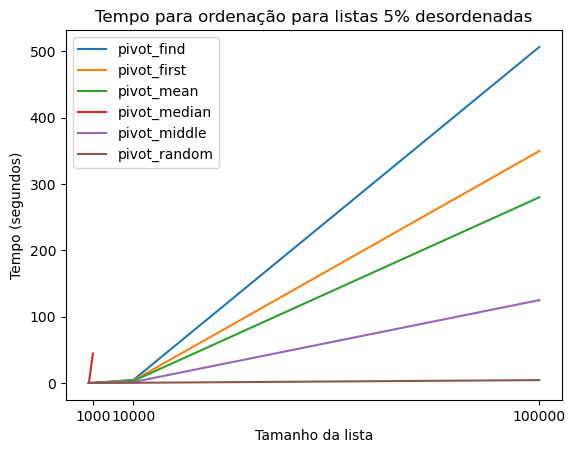

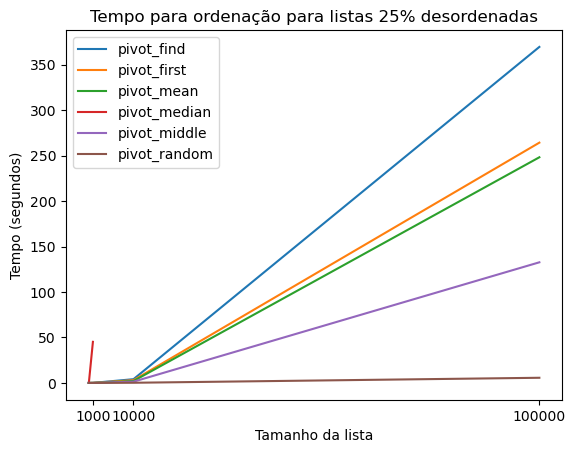

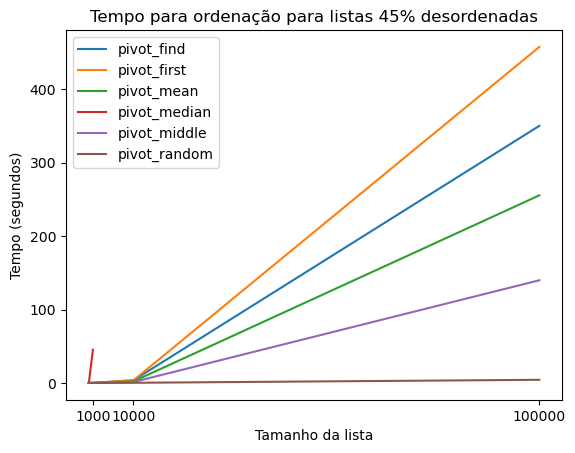

In [19]:
for label, df in tempo_medio.groupby("shuffle_percentage"):
    methods = df["method"].unique()
    for method in methods:
        df_temp = df[df["method"] == method]
        plt.plot(
            df_temp["list_size"].values,
            df_temp["time_seconds"].values,
            label=method,
        )
        plt.title(f"Tempo para ordenação para listas {label}% desordenadas")
        plt.xlabel("Tamanho da lista")
        plt.ylabel("Tempo (segundos)")
        plt.xticks([1000, 10000, 100000])
        plt.legend()
    plt.savefig(f"./img/shuffle/{label}.png")
    plt.show()